<a href="https://colab.research.google.com/github/Malika44/Regression-Models-Explained/blob/main/A_Comprehensive_Guide_to_Linear_Regression%2C_Logistic_Regression%2C_and_Multinomial_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


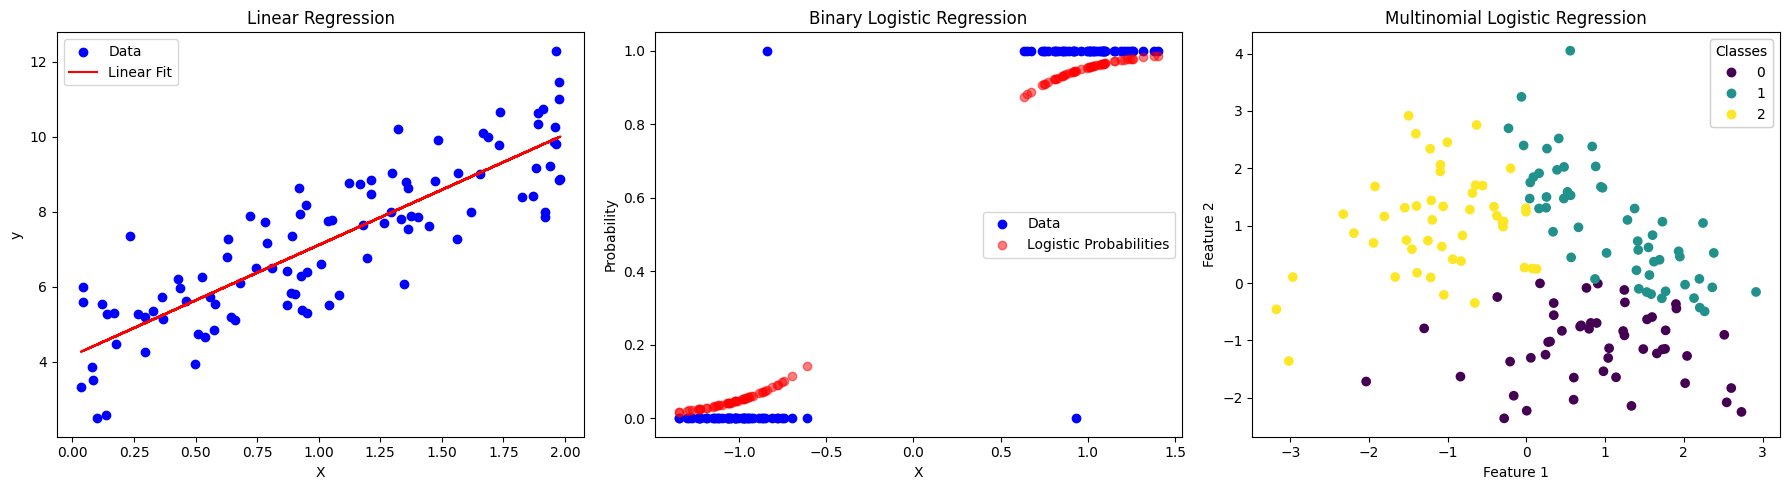

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.datasets import make_classification

# Linear Regression
X_lin = 2 * np.random.rand(100, 1)
y_lin = 4 + 3 * X_lin + np.random.randn(100, 1)
lin_reg = LinearRegression()
lin_reg.fit(X_lin, y_lin)
y_lin_pred = lin_reg.predict(X_lin)

# Binary Logistic Regression
X_log, y_log = make_classification(
    n_samples=100,
    n_features=1,
    n_informative=1,
    n_redundant=0,
    n_clusters_per_class=1,
    flip_y=0.03,
    random_state=0
)
log_reg = LogisticRegression()
log_reg.fit(X_log, y_log)
y_log_prob = log_reg.predict_proba(X_log)[:, 1]

# Multinomial Logistic Regression
X_multi, y_multi = make_classification(
    n_samples=150,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_classes=3,
    n_clusters_per_class=1,
    random_state=0
)
multi_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs')
multi_reg.fit(X_multi, y_multi)
y_multi_pred = multi_reg.predict(X_multi)

# Final Plotting
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Linear Regression Plot
axs[0].scatter(X_lin, y_lin, color='blue', label='Data')
axs[0].plot(X_lin, y_lin_pred, color='red', label='Linear Fit')
axs[0].set_title('Linear Regression')
axs[0].set_xlabel('X')
axs[0].set_ylabel('y')
axs[0].legend()

# Logistic Regression Plot
axs[1].scatter(X_log, y_log, color='blue', label='Data')
axs[1].scatter(X_log, y_log_prob, color='red', label='Logistic Probabilities', alpha=0.5)
axs[1].set_title('Binary Logistic Regression')
axs[1].set_xlabel('X')
axs[1].set_ylabel('Probability')
axs[1].legend()

# Multinomial Logistic Regression Plot
scatter = axs[2].scatter(X_multi[:, 0], X_multi[:, 1], c=y_multi_pred, cmap='viridis')
axs[2].set_title('Multinomial Logistic Regression')
axs[2].set_xlabel('Feature 1')
axs[2].set_ylabel('Feature 2')
legend1 = axs[2].legend(*scatter.legend_elements(), title="Classes")
axs[2].add_artist(legend1)

plt.tight_layout()
plt.show()

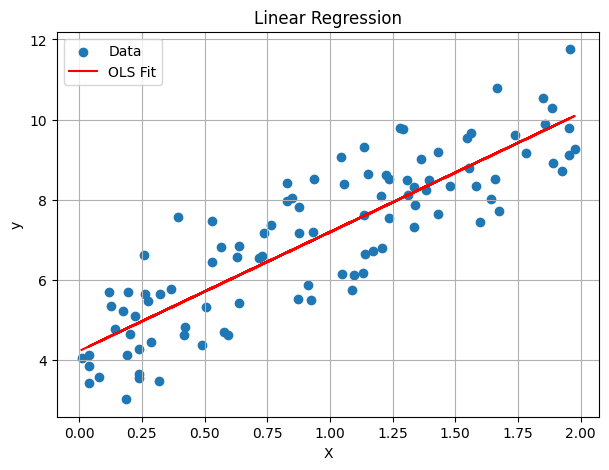


Linear Regression MSE: 0.992

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        39

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



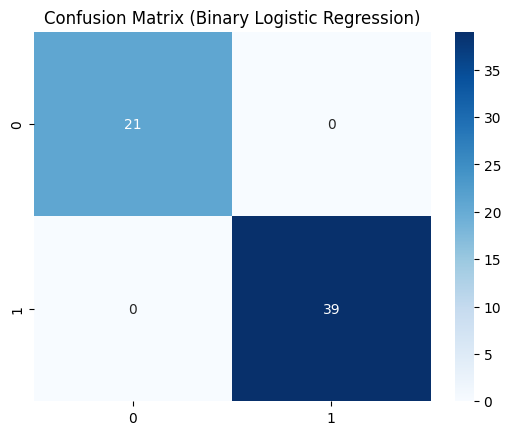


Multinomial Logistic Regression Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



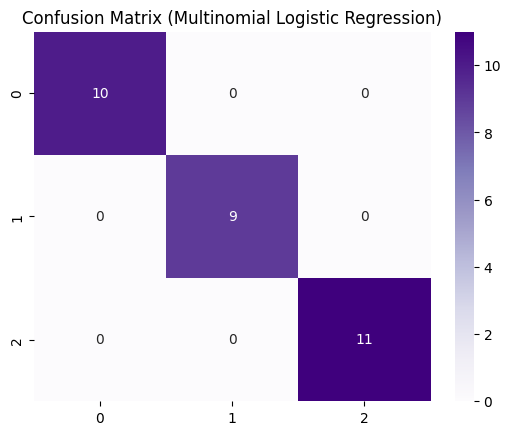

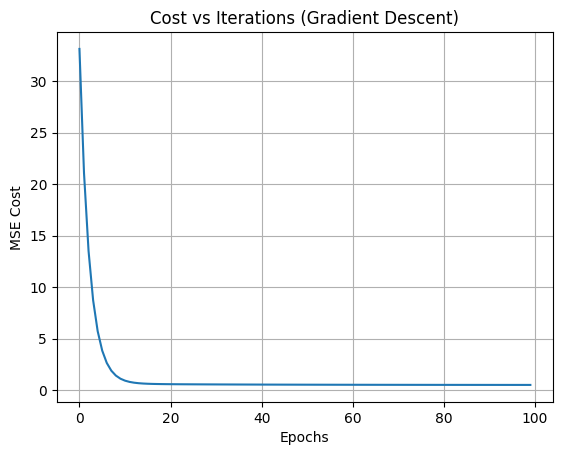


Theta from Gradient Descent: [4.02287769 3.14528871]

--- Key Learnings ---
1. Linear Regression fits a line by minimizing MSE using OLS or Gradient Descent.
2. Logistic Regression models binary outcomes with a sigmoid, optimized via cross-entropy loss.
3. Multinomial Logistic Regression extends logistic regression to multiple classes.
4. Loss functions measure model performance and guide optimization.
5. Optimization techniques include OLS (analytical) and Gradient Descent (iterative).


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import warnings
warnings.filterwarnings("ignore")

# ========== LINEAR REGRESSION ==========

# Generate synthetic linear data
np.random.seed(0)
X_linear = 2 * np.random.rand(100, 1)
y_linear = 4 + 3 * X_linear + np.random.randn(100, 1)

# Train Linear Regression using OLS
lin_reg = LinearRegression()
lin_reg.fit(X_linear, y_linear)
y_pred_linear = lin_reg.predict(X_linear)

# Plot
plt.figure(figsize=(7,5))
plt.scatter(X_linear, y_linear, label='Data')
plt.plot(X_linear, y_pred_linear, color='red', label='OLS Fit')
plt.title("Linear Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

# MSE Loss
mse = mean_squared_error(y_linear, y_pred_linear)
print(f"\nLinear Regression MSE: {mse:.3f}")

# ========== LOGISTIC REGRESSION ==========

# Binary classification
X_bin, y_bin = make_classification(n_samples=300, n_features=2, n_redundant=0,
                                   n_clusters_per_class=1, class_sep=1.5, random_state=42)

X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X_bin, y_bin, test_size=0.2)

# Logistic Regression Model
log_reg = LogisticRegression()
log_reg.fit(X_train_bin, y_train_bin)
y_pred_log = log_reg.predict(X_test_bin)

# Evaluation
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test_bin, y_pred_log))
sns.heatmap(confusion_matrix(y_test_bin, y_pred_log), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (Binary Logistic Regression)")
plt.show()

# ========== MULTINOMIAL LOGISTIC REGRESSION ==========

# Iris Dataset for Multiclass
iris = load_iris()
X_iris = iris.data
y_iris = iris.target

X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42)

# Multinomial Logistic Regression
multi_log = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)
multi_log.fit(X_train_iris, y_train_iris)
y_pred_multi = multi_log.predict(X_test_iris)

# Evaluation
print("\nMultinomial Logistic Regression Classification Report:")
print(classification_report(y_test_iris, y_pred_multi, target_names=iris.target_names))
sns.heatmap(confusion_matrix(y_test_iris, y_pred_multi), annot=True, fmt='d', cmap='Purples')
plt.title("Confusion Matrix (Multinomial Logistic Regression)")
plt.show()

# ========== MANUAL GRADIENT DESCENT FOR LINEAR REGRESSION ==========

def compute_mse(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    error = predictions - y
    return (1/(2*m)) * np.dot(error.T, error)

def gradient_descent(X, y, theta, alpha, epochs):
    m = len(y)
    cost_history = []

    for _ in range(epochs):
        gradients = (1/m) * X.T.dot(X.dot(theta) - y)
        theta -= alpha * gradients
        cost = compute_mse(X, y, theta)
        cost_history.append(cost[0][0])
    return theta, cost_history

# Add bias term
X_b = np.c_[np.ones((100, 1)), X_linear]
y_b = y_linear
theta_init = np.random.randn(2,1)

theta_final, cost_hist = gradient_descent(X_b, y_b, theta_init, alpha=0.1, epochs=100)

# Plot cost
plt.plot(cost_hist)
plt.title("Cost vs Iterations (Gradient Descent)")
plt.xlabel("Epochs")
plt.ylabel("MSE Cost")
plt.grid(True)
plt.show()

print(f"\nTheta from Gradient Descent: {theta_final.ravel()}")

# ========== KEY POINTS SUMMARY ==========

print("\n--- Key Learnings ---")
print("1. Linear Regression fits a line by minimizing MSE using OLS or Gradient Descent.")
print("2. Logistic Regression models binary outcomes with a sigmoid, optimized via cross-entropy loss.")
print("3. Multinomial Logistic Regression extends logistic regression to multiple classes.")
print("4. Loss functions measure model performance and guide optimization.")
print("5. Optimization techniques include OLS (analytical) and Gradient Descent (iterative).")
